# Relationship between Amount of Financial Aid Received and Socioeconomic Background
## Data 8 Connector -- Web Data Visualization -- Final Project
### Group members:
Michael Wu
Sara Wu
Angie Mejia
Prenav Bhasin

## Introduction:
It is a common belief that people from a lower socio-economical background will have a lower education level. Through this project, we want to find out whether the affluency of a geographical area actually impact students’ ability to attain higher education. If so, what kind of conditions, as in geographical, the background of their parents, or others would impact their opportunity the greatest. Furthermore, we want to explore whether the FAFSA program actually helps students from those low income backgrounds afford college   by   comparing   dataset   from   different   times.


### 1. The   topic/problem   being   addressed
We are addressing the common notion that people who come from lower socioeconomic parts of the country usually do not advance far in terms of education. There is a stereotype of what someone who drops out of school looks like, but we want to try and see if there is really a connection. We believe that this information could prove to show different results since there could more motivation than ever for lower classes to achieve a higher education because of their situation. A second part of the research is looking at how much help those students get if they continue towards college, which is seen as rare. Scholarships and other forms of financial aid are a necessity for groups like first generation students or those who come from a single parent household where the parent cannot afford schooling on their own. Specifically, we would look at help they would   receive   financially   through   FAFSA.
### 2. The   motivation   behind   your   topic   choice
Socioeconomic status encompasses not just income, but also educational attainment, and subjective perceptions of social status and social class by differ in quality of life attributes as well as the opportunities and privileges afforded to people within the society. It is a common belief that people from a lower socio-economical background will more likely to be in poverty as well as having a lower education level. The school systems in low socioeconomic communities are often under resourced, negatively affecting students’ academic progress and outcomes. Inadequate education and increased dropout rates affect students’ academic achievement, perpetuating the low socioeconomic status of the community. Improving school systems and intervention programs may help to reduce some of these risk factors; therefore, having a closer look the correlation between Socioeconomic status, geographical demography, and education   distribution is essential.

### Description of Datasets:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The FAFSA dataset can give us insight in how many students are receiving how much grants from State and Federal level. Also, the Education dataset provided by the United State Department of Agriculture -- Department of Economic Research would give us specific knowledge about how many people are attaining which level of education at which county. Combining both the FAFSA and the Education dataset, we can gain insight in whether having financial aid has any correlation with the highest education level   attained   in   a   specific   location   or   the   highest   degree   one   can   get. <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; On the other hand, we also want to compare the Education dataset with the Poverty Dataset provided by the US Department of Economic Research. We want to see whether financial aid actually help poorer county/state to in the average education level. Since the Poverty dataset is mostly by percent, we believe it might be helpful to also take a look at the Population dataset, which, if combined with the Poverty dataset, can give us the amount of people at each county/state who are in poverty. And using that number, compared with the Education and Financial Aid dataset, we can clearly see whether   Financial   Aid   is   actually   effective.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; These data sets all have solid, trustworthy background because they are all government based   datasets.

In [3]:
# Importing and basic utility cell
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
%matplotlib inline
!pip install datascience 
from datascience import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

#### Read in Data
Panda has a really useful function of panda.read_excel where I can just input the file directory and it will read the corresponding excel for me automatically. <br>
However, as I read it in, I found that each excel has different styles, eg, some has a header that makes that actual data start at row 4 instead of 1. Therefore, I had to manually go into each dataset, find out where does the actual data begin, and pass in an argument called 'header' into panda.read_excel to let panda read from that row and after.

Therefore, for each pd.read_excel, I have pd.read_excel([FILE_PATH],header = [START OF DATA])

In [4]:
# Reading in Data
raw_Education = pd.read_excel('data/Education.xls',header = 4)
raw_PopulationEstimates = pd.read_excel('data/PopulationEstimates.xls',header = 2)
raw_PovertyEstimates = pd.read_excel('data/PovertyEstimates.xls',header = 3)
raw_Unemployment = pd.read_excel('data/Unemployment.xls',header = 9)
raw_financial_aid = pd.read_excel('data/FinancialAidByLocation.xls',header = 4)

#### Filtering
The second step would be to filter out datas that we don't want. <br>
The datasets are detailed to a county level. It is too detailed for the purpose of this visualization. And therefore we decided to take only the state stats, which we can do by taking only that values that are in the state dictionary that we created earlier

In [5]:
#Filtering Data
filtered_education = raw_Education[raw_Education['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1).drop(335)
filtered_population_estimates = raw_PopulationEstimates[raw_PopulationEstimates['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1).drop(328)
filtered_poverty_estimate = raw_PovertyEstimates[raw_PovertyEstimates['Area_Name'].isin(states.values())]\
                            .dropna(axis = 1).drop(328)
filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())]\
                                .dropna(axis = 1).drop(330)
    
filtered_financial_aid = raw_financial_aid[['Location','Disbursements                                        (in millions).1',\
                   'Recipients                                              (in thousands).1']].\
                    rename(columns = \
                           {'Disbursements                                        (in millions).1':'Disbursements',\
                            'Recipients                                              (in thousands).1':'Recepient'})\
                    [raw_financial_aid['Location'].isin(states.values())]

#### Organizing Data
Panda is a relatively new library and therefore, we decided to that datascience library would probably be a better library to use since we all took data 8. <br>
We can do this by calling the Table.from_df method onto any dataframe object.<br>
So we converted all pd dataframe to datascience tables


In [6]:
# putting into the Datascience Table format
education_raw = Table.from_df(filtered_education)
population_estimate_raw = Table.from_df(filtered_population_estimates)
poverty_estimates_raw = Table.from_df(filtered_poverty_estimate)
unemployment_raw = Table.from_df(filtered_unemployment)
financial_aid_raw = Table.from_df(filtered_financial_aid)

Now that we have 
1. read in the data
2. cleaned and filtered the data
3. Organized the data, <br>
Let's start out doing some easy but cool manipulation and visualization of the data <br>

Let's first examine the unemployment rate of each state from 2014-2016. 

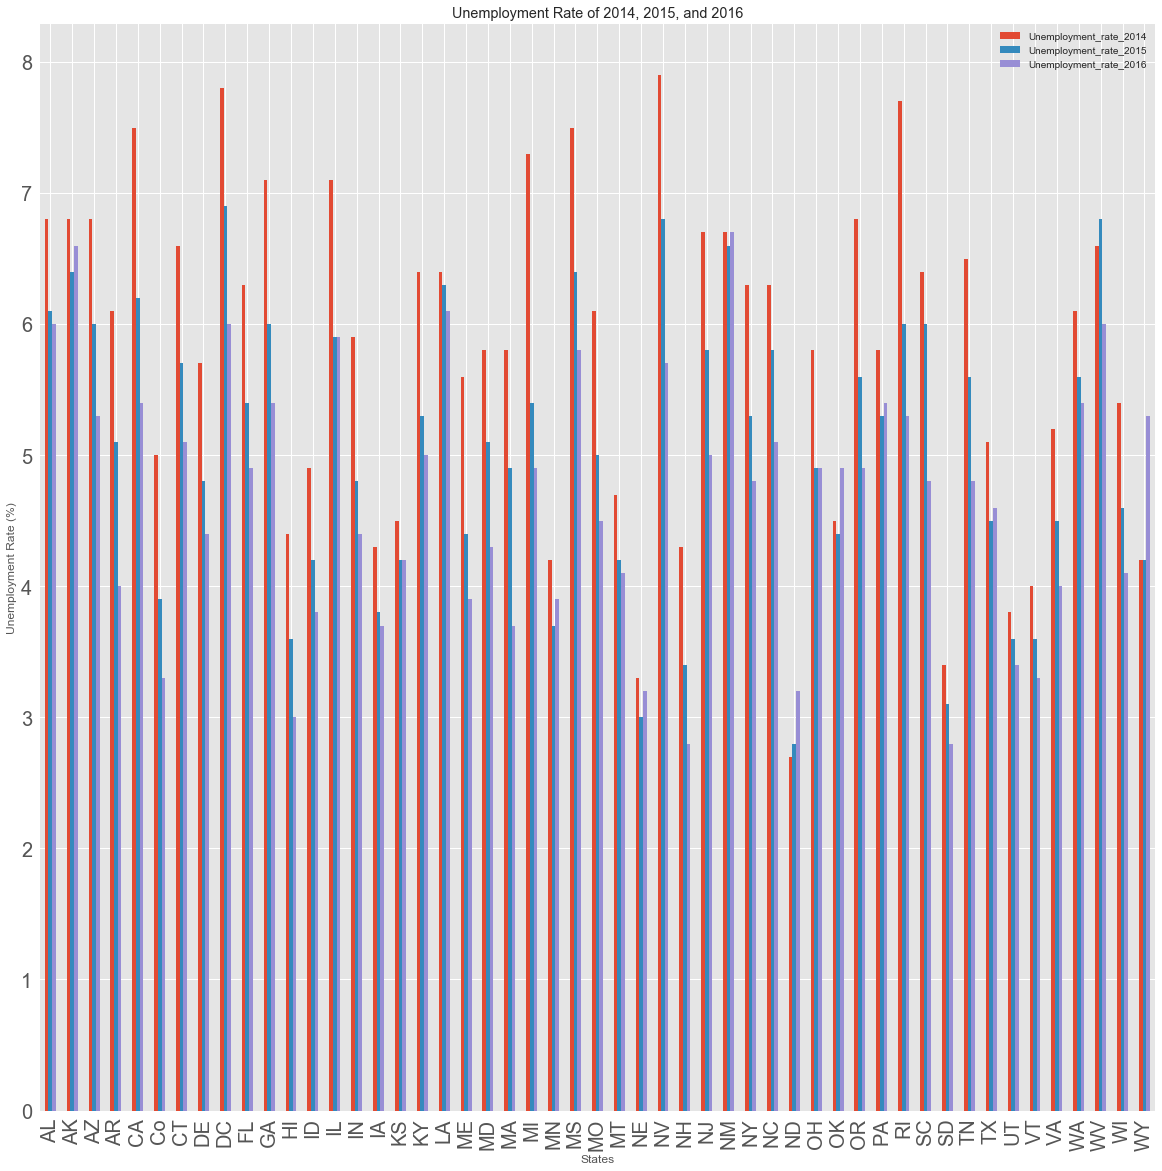

In [7]:
# selecting unemployment rate from 2014-2015
unemployment_rate_2014_2015_2016 = filtered_unemployment[['State',
                                                      'Unemployment_rate_2014',
                                                      'Unemployment_rate_2015',
                                                      'Unemployment_rate_2016']] 
# plot unemployment rate from 2014-2015
unemployment_rate_2014_2015_2016_plot = unemployment_rate_2014_2015_2016.plot.bar(figsize = (20,20),
                                               x = unemployment_rate_2014_2015_2016['State'],
                                               title = 'Unemployment Rate of 2014, 2015, and 2016',
                                               fontsize = 20)
# label our graph
unemployment_rate_2014_2015_2016_plot.set_ylabel('Unemployment Rate (%)')
unemployment_rate_2014_2015_2016_plot.set_xlabel('States')


This graph is hard to interpret because it contain too much information. <br>
However, if we stare at it long enough, we can see that in general, throughout the three years, generally, the unemployment rate has decreased in each state 

Let's make something better. We learnt that if we put too many information in one graph, it would be hard to read and interpret. So we are going to focus on poverty rate in 2015. We are going to examine which statehas the most number of population in poverty (poverty as defined by the US Department of Economic Research, which is where the data is retrieved from)

In order to do this, we need to filter out only the poverty rate of 2015 for all states. <br>
We then sorted the data in descending order with repect to the poverty rate. <br>
We then made a bar plot of the sorted table

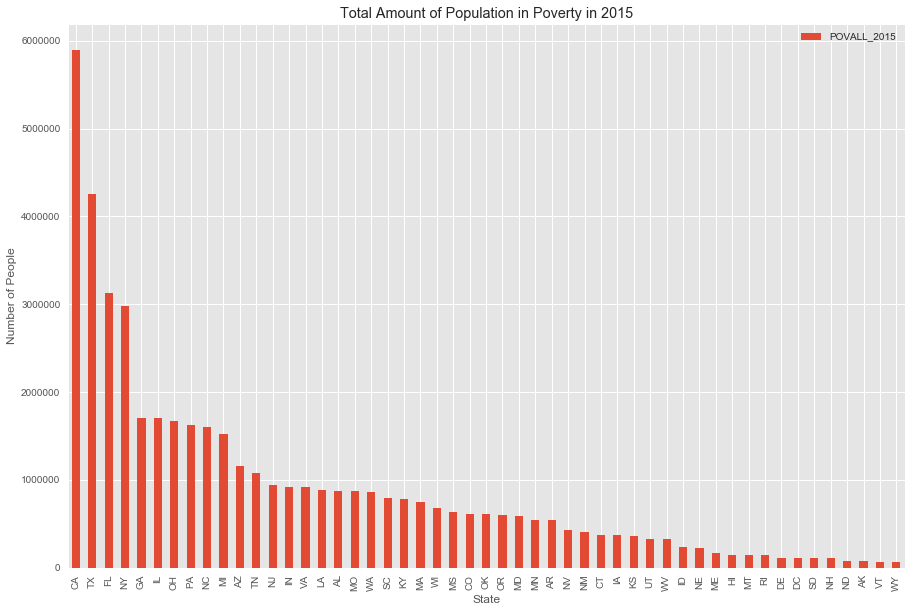

In [8]:
cleaned_sort_by_states = filtered_poverty_estimate.drop(filtered_poverty_estimate.columns[[0,3,4,5,6,]],axis = 1)
selected = cleaned_sort_by_states[['State','POVALL_2015','CI90LBAll_2015','CI90UBALL_2015']].sort_values(by = "POVALL_2015",ascending = False)
pov_in_2015 = selected[['State','POVALL_2015']].plot(x = "State", kind = 'bar',figsize=(15,10),title = 'Total Amount of Population in Poverty in 2015')
pov_in_2015.set_ylabel('Number of People')

We can see from this table that California has the highest number of people in poverty. It is significantly higher than its precedent Texas and Florida. 

#### Organizing data con...
As you may have felt, having 5 separate tables could become quite messy if we proceed to make more complex tables, therefore, we decided to take only the values we need and join it into a single table called overall.

In [9]:
# Overall Dataset
overall = education_raw.join('Area_Name',population_estimate_raw,'Area_Name').\
        join('Area_Name',poverty_estimates_raw,'Area_Name').\
        join('Area_Name',unemployment_raw.\
             drop(['Rural-urban_Continuum_Code_2003',
                   'Urban_Influence_Code_2003',
                   'Rural-urban_Continuum_Code_2013',
                   'Urban_Influence_Code_2013']),
             'Area_name').\
        join('Area_Name',financial_aid_raw,'Location')

So we had some fun graphing individual datasets, now we are going to try to plot something that incorporates all that we've want -- poverty, education, unemployment, and financial aid. <br>

To do that clearly and efficiently, we need to create a separate table from overall that has
1. clearer naming scheme
2. revised financial aid data so that it fits on the unit scale of other data


In [10]:
t = Table().with_columns('State',overall.column('Area_Name'),
                     'Percent Adult having less than high school degree', 
                         overall.column('Percent of adults with less than a high school diploma, 2011-2015'),   
                     'Percent in Poverty',overall.column('PCTPOVALL_2015'),
                     'Percent Unemployment',overall.column('Unemployment_rate_2015'),
                     'Average Grant Per Person (In thousands)',
                         ((1e6*overall.column('Disbursements')) / (overall.column('Recepient') * 1e3)) / 1000
                        )

We thought that it would be useful to label each bar, since each bar represents a different value, and therefore, wrote this autolabel function that takes in a bar, and calculate its corresponding value

In [11]:
def autolabel(rects):
    # Input: list of matplotlib ax.bar
    # Output: None
    # Purpose:
        # get the height of each ax.bar in the input list
        # add the height of this bar on the top middle of this bar, calculated by 1.05 of its height.
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

We want to plot something meaningful, so lets sort the column Percent adult having less than high school degree in descending order, so that there is pattern
<br>


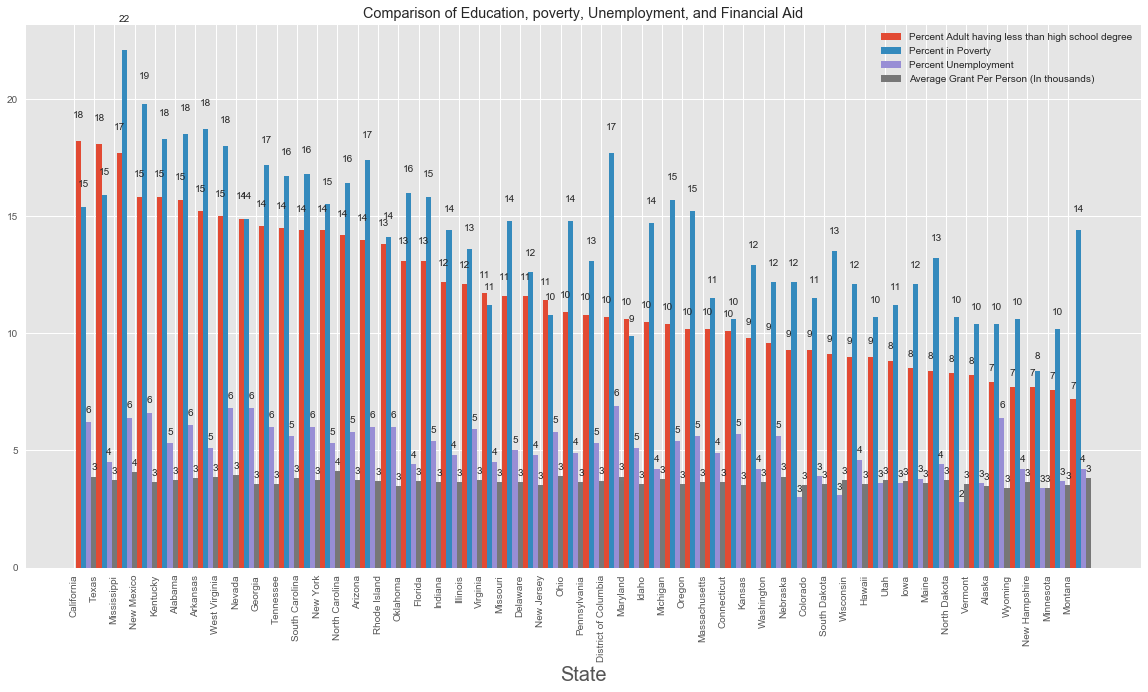

In [12]:
t = t.sort('Percent Adult having less than high school degree',descending = True)
width = 0.25
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
bar_list = []
for col_index in range(t.num_columns):
    if col_index != 0:
        current_bar = ax.bar(np.arange(t.num_rows) + width * col_index, 
                           t.column(col_index),
                           width,
                           label = t.labels[col_index])   
        bar_list.append(current_bar)

for index in range(len(bar_list)):
    autolabel(bar_list[index])
    
ax.set_xlabel('State',fontsize = 20)
ax.legend()
plt.xticks(np.arange(50),t.column(0),rotation = 90)
plt.title('Comparison of Education, poverty, Unemployment, and Financial Aid')
plt.show()

Okay, alghough that plot is very comprehensive, it is not very easy to interpret. Let's make two maps side by side so that it is easier to interpret

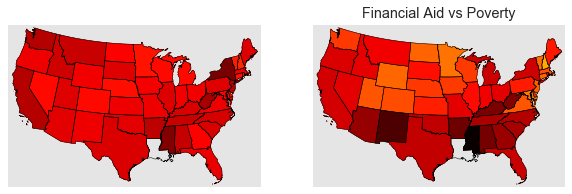

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
fig = plt.figure(figsize = (10,10))
ax_fin = fig.add_subplot(1,2,1)
fin_aid = t.column(4)
location = t.column(0)

location_fin_aid = {}
for index in range(len(fin_aid)):
    location_fin_aid[location[index]] = fin_aid[index]

poverty = t.column(2)
location = t.column(0)

location_poverty= {}
for index in range(len(poverty)):
    location_poverty[location[index]] = poverty[index]

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('data/st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico','Louisiana']:
        pop = location_fin_aid[statename] * 100
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.0 - pop**2 / (450**2))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
#ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','Louisiana']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax_fin.add_patch(poly)
  
"""
END OF PLOTTING FINANCIAL AID

START OF PLOTTING POVERTY
"""

ax_pov = fig.add_subplot(1,2,2)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('data/st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# choose a color for each state based on population density.
colors_pov={}
statenames_pov=[]
cmap = plt.cm.hot # use 'hot' colormap
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico','Louisiana']:
        pop = location_poverty[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors_pov[statename] = cmap(1.0 - pop/22)[:3]
    statenames_pov.append(statename)
# cycle through state names, color each one.
#ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames_pov[nshape] not in ['District of Columbia','Puerto Rico','Louisiana']:
        color = rgb2hex(colors_pov[statenames_pov[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax_pov.add_patch(poly)


plt.title('Financial Aid vs Poverty')
plt.show()

There is a problem with using heat map with financial aid -- each data point of financial aid is too close to each other and therefore, it is difficult by human eye to distinguish between two points. 
<br>
Let's instead use scatter plots

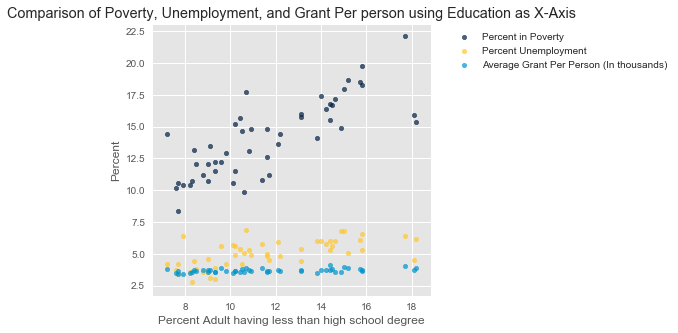

In [15]:
t.drop(0).scatter(0)
plt.title('Comparison of Poverty, Unemployment, and Grant Per person using Education as X-Axis')
plt.ylabel('Percent')

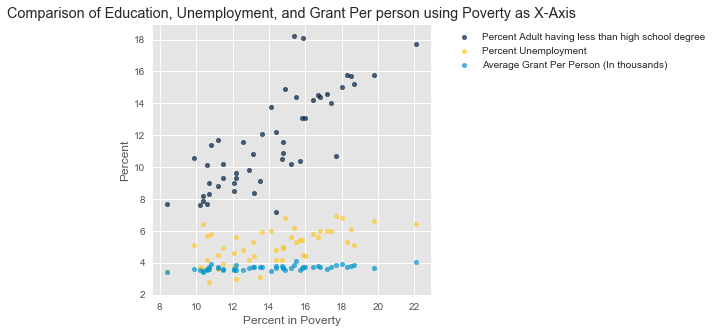

In [16]:
t.drop(0).scatter(1)
plt.title('Comparison of Education, Unemployment, and Grant Per person using Poverty as X-Axis')
plt.ylabel('Percent')

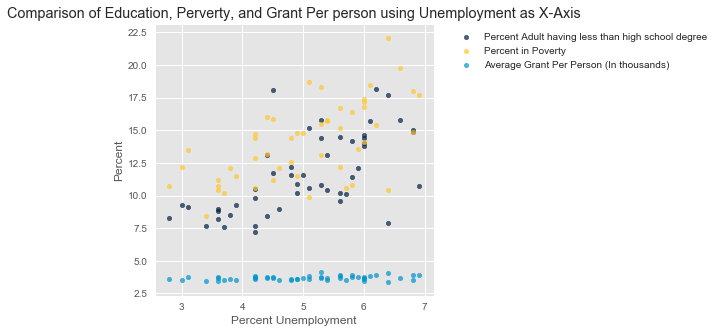

In [17]:
t.drop(0).scatter(2)
plt.title('Comparison of Education, Perverty, and Grant Per person using Unemployment as X-Axis')
plt.ylabel('Percent')

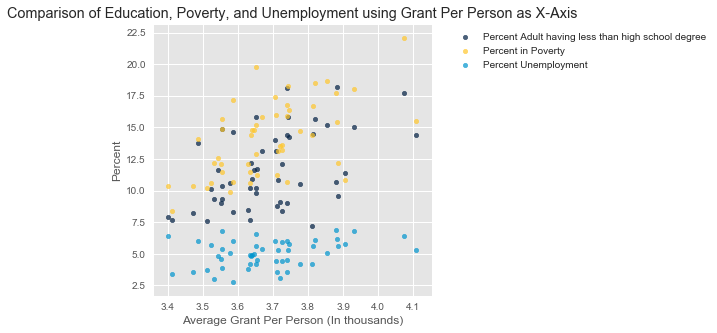

In [18]:
t.drop(0).scatter(3)
plt.title('Comparison of Education, Poverty, and Unemployment using Grant Per Person as X-Axis')
plt.ylabel('Percent')

From these scatter plots, we can easily see that the correlation between Poverty, Education, Unemployment, and Financial Aid is low. Now that is a qualitifive statement, lets make it quantitative using what we've just learnt in Data 8 -- linear regression

In [19]:
print('The average of the financial aid per person across all states is',np.mean(t.column(4)),'thousand dollars')

The average of the financial aid per person across all states is 3.68826639479 thousand dollars


In [20]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [21]:
greater_than_avg = (t.column(4) > np.mean(t.column(4)))
lin_reg_data = t.with_column('per_person_FA_greater_than_avg',greater_than_avg)
print('Correlation between Percent Adult having less than high school degree and per_person_FA_greater_than_avg:\n -->',
      correlation(lin_reg_data,'Percent Adult having less than high school degree','per_person_FA_greater_than_avg'),'\n')

print('Correlation between Percent in Poverty and per_person_FA_greater_than_avg:\n -->',
      correlation(lin_reg_data,'Percent in Poverty','per_person_FA_greater_than_avg') ,'\n')

print('Correlation between Percent Unemployment and per_person_FA_greater_than_avg:\n -->',
      correlation(lin_reg_data,'Percent Unemployment','per_person_FA_greater_than_avg'),'\n')

Correlation between Percent Adult having less than high school degree and per_person_FA_greater_than_avg:
 --> 0.377207925768 

Correlation between Percent in Poverty and per_person_FA_greater_than_avg:
 --> 0.436115540779 

Correlation between Percent Unemployment and per_person_FA_greater_than_avg:
 --> 0.207603844745 



Now that we have both a visualization and qualitative values for the correlation between education, poverty, unemployment and financial aid.
<br/>
#### Thus, we can conclude that Financial Aid has low correlation with the other three parameters that we are analyzing. 
<br/>
This conclusion complement the related work (please refer to our presentation). The related work indicated that there is a trend that the lower the socioeconomic status, the less likely that person is going to file FAFSA and get Financial Aid. And that might be lead to our conclusion that financial aid has low correlation with education, poverty and unemployment. 